In [2]:
import pandas as pd

# Load the data
file_path = 'option_GS_df.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Unnamed: 0,UnderlyingPrice,OptionSymbol,Type,Expiration,DataDate,Strike,Last,Bid,Ask,...,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega,AKA
0,0,174.09,GS160108C00125000,call,01/08/2016,01/05/2016,125.0,0.0,46.95,50.80,...,0,0,0.0874,0.0,3.1911,1.0000,0.0000,0.0000,0.0000,GS160108C00125000
1,1,174.09,GS160108P00125000,put,01/08/2016,01/05/2016,125.0,0.0,0.00,0.31,...,0,0,1.9822,0.0,2.2141,-0.0150,0.0014,-0.2242,0.0053,GS160108P00125000
2,2,174.09,GS160108C00130000,call,01/08/2016,01/05/2016,130.0,0.0,41.80,45.80,...,0,0,0.0874,0.0,2.8946,1.0000,0.0000,0.0000,0.0000,GS160108C00130000
3,3,174.09,GS160108P00130000,put,01/08/2016,01/05/2016,130.0,0.0,0.00,0.31,...,0,0,1.7931,0.0,1.9882,-0.0175,0.0017,-0.2310,0.0060,GS160108P00130000
4,4,174.09,GS160108C00135000,call,01/08/2016,01/05/2016,135.0,0.0,36.95,40.90,...,0,0,0.0874,0.0,2.6480,1.0000,0.0000,0.0000,0.0000,GS160108C00135000


In [4]:
data.columns

Index(['Unnamed: 0', 'UnderlyingPrice', 'OptionSymbol', 'Type', 'Expiration',
       ' DataDate', 'Strike', 'Last', 'Bid', 'Ask', 'Volume', 'OpenInterest',
       'T1OpenInterest', 'IVMean', 'IVBid', 'IVAsk', 'Delta', 'Gamma', 'Theta',
       'Vega', 'AKA'],
      dtype='object')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


data = data.rename(columns={' DataDate': 'DataDate'})


data['Expiration'] = pd.to_datetime(data['Expiration'], format='%m/%d/%Y')
data['DataDate'] = pd.to_datetime(data['DataDate'], format='%m/%d/%Y')


data['TimeToMaturity'] = (data['Expiration'] - data['DataDate']).dt.days / 365.0


filtered_data = data[['UnderlyingPrice', 'Type', 'Strike', 'Bid', 'Ask', 'TimeToMaturity', 'IVMean']]


filtered_data.head()


,UnderlyingPrice,Type,Strike,Bid,Ask,TimeToMaturity,IVMean
0,174.09,call,125.0,46.95,50.80,0.008219,0.0874
1,174.09,put,125.0,0.00,0.31,0.008219,1.9822
2,174.09,call,130.0,41.80,45.80,0.008219,0.0874
3,174.09,put,130.0,0.00,0.31,0.008219,1.7931
4,174.09,call,135.0,36.95,40.90,0.008219,0.0874


In [11]:
def black_scholes(S, X, T, r, sigma, option_type='call'):
    
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = X * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Option type must be 'call' or 'put'")
    
    return price


risk_free_rate = 0.01


filtered_data['BS_Price'] = filtered_data.apply(lambda row: black_scholes(row['UnderlyingPrice'], row['Strike'], row['TimeToMaturity'], risk_free_rate, row['IVMean'], row['Type']), axis=1)


filtered_data.head(10)


C:\Users\harsh\AppData\Local\Temp\ipykernel_20700\2880462795.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['BS_Price'] = filtered_data.apply(lambda row: black_scholes(row['UnderlyingPrice'], row['Strike'], row['TimeToMaturity'], risk_free_rate, row['IVMean'], row['Type']), axis=1)


,UnderlyingPrice,Type,Strike,Bid,Ask,TimeToMaturity,IVMean,BS_Price
0,174.09,call,125.0,46.95,50.80,0.008219,0.0874,49.100274
1,174.09,put,125.0,0.00,0.31,0.008219,1.9822,0.337615
2,174.09,call,130.0,41.80,45.80,0.008219,0.0874,44.100684
3,174.09,put,130.0,0.00,0.31,0.008219,1.7931,0.350881
4,174.09,call,135.0,36.95,40.90,0.008219,0.0874,39.101095
5,174.09,put,135.0,0.00,0.33,0.008219,1.5624,0.312616
6,174.09,call,140.0,31.75,35.80,0.008219,0.0874,34.101506
7,174.09,put,140.0,0.00,0.22,0.008219,1.3428,0.277233
8,174.09,call,145.0,26.75,30.95,0.008219,0.0874,29.101917
9,174.09,put,145.0,0.00,0.23,0.008219,1.1126,0.220914


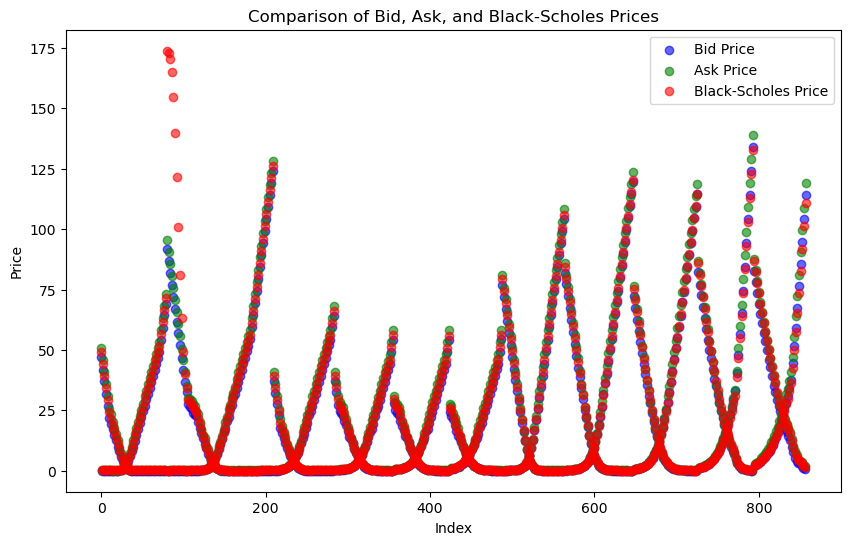

In [12]:

plt.figure(figsize=(10, 6))

plt.scatter(filtered_data.index, filtered_data['Bid'], color='blue', label='Bid Price', alpha=0.6)

plt.scatter(filtered_data.index, filtered_data['Ask'], color='green', label='Ask Price', alpha=0.6)

plt.scatter(filtered_data.index, filtered_data['BS_Price'], color='red', label='Black-Scholes Price', alpha=0.6)

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Comparison of Bid, Ask, and Black-Scholes Prices')
plt.legend()
plt.show()
